# Dataset Used
### heart disease prediction
<a href='https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset' >Download from here</a>

# Downloading Dataset

In [1]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset")

Skipping, found downloaded files in ".\diabetes-prediction-dataset" (use force=True to force download)


# importing libraries

In [26]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Data cleaning


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
print(df['gender'].unique())
print(df['smoking_history'].unique())

['Female' 'Male' 'Other']
['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [8]:
gender_encoder , smk_encoder = LabelEncoder() , LabelEncoder()
df['gender']=gender_encoder.fit_transform(df['gender'])
df['smoking_history']=smk_encoder.fit_transform(df['smoking_history'])

In [9]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


# Data Visulization

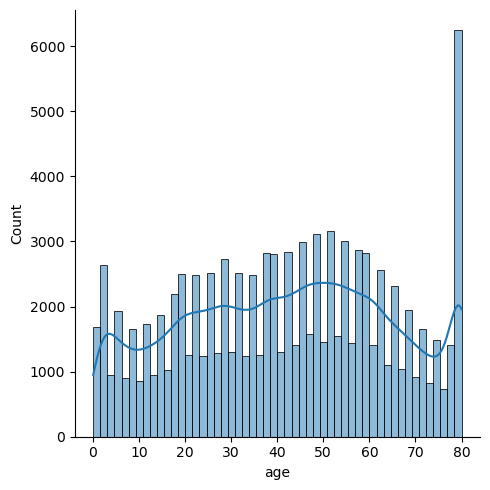

In [10]:
sns.displot(df['age'],kde=True)

<Axes: xlabel='diabetes', ylabel='age'>

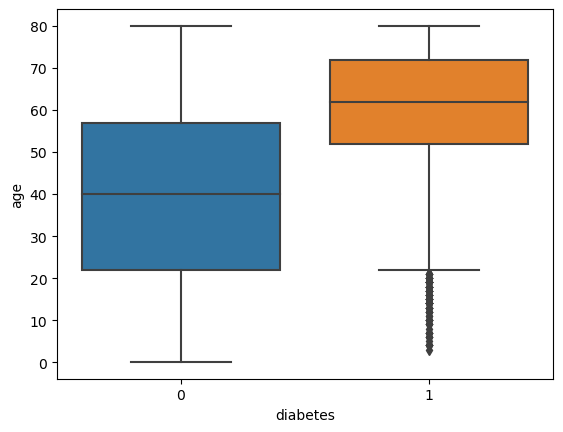

In [11]:
sns.boxplot(x='diabetes',y='age',data = df)

### Risk of diabetes increase with age

<Axes: xlabel='diabetes', ylabel='bmi'>

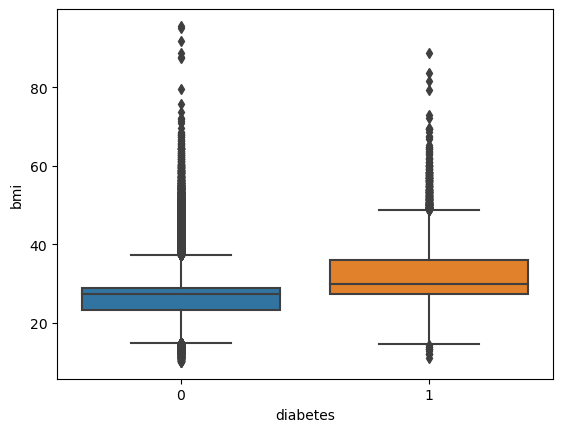

In [12]:
sns.boxplot(x='diabetes',y='bmi',data=df)

### Diabetic Patients have heigher BMI

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

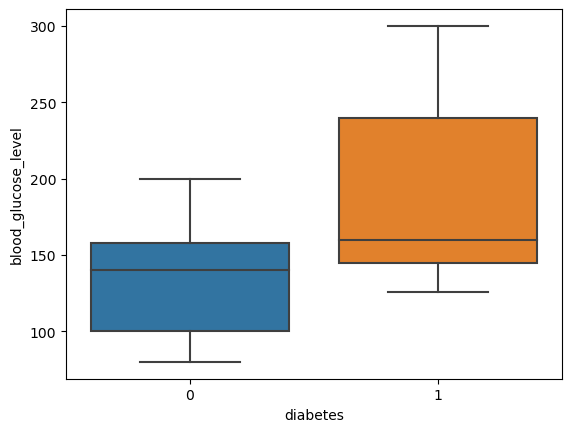

In [13]:
sns.boxplot(x='diabetes',y='blood_glucose_level',data=df)

### Diabetic Patients have heigher Blood Glucose

<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

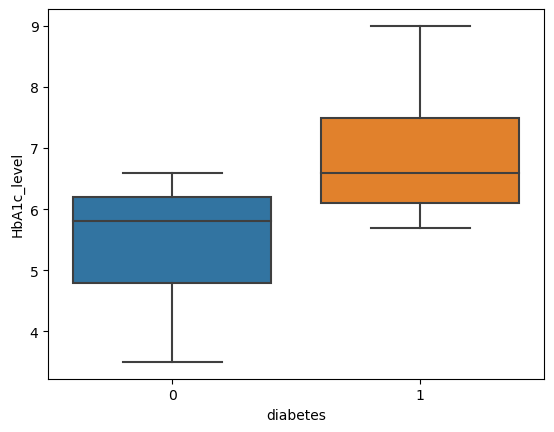

In [14]:
sns.boxplot(x='diabetes',y='HbA1c_level',data=df)


<Axes: >

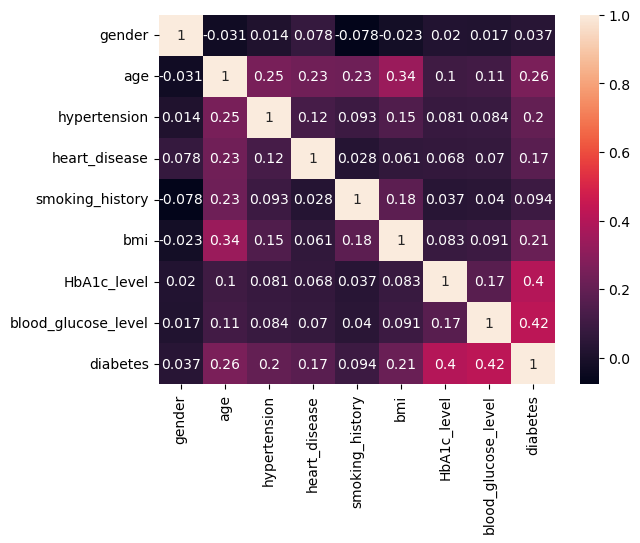

In [15]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [16]:
x = df.drop(columns=['diabetes'],axis=-1)
y = df['diabetes']

In [21]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Training , Testing Models

In [33]:
logistic_reg_model = LogisticRegression()
decisoin_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

In [34]:
logistic_reg_model.fit(x_train,y_train)
decisoin_tree_model.fit(x_train,y_train)
random_forest_model.fit(x_train,y_train)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [35]:
models = [logistic_reg_model,decisoin_tree_model,random_forest_model,knn_model]
train=[]
test=[]
for i in models:
    train_score = float("{:.2f}".format(i.score(x_train,y_train)))
    test_score = float("{:.2f}".format(i.score(x_test,y_test)))
    train.append(train_score)
    test.append(test_score)
    print('Model name ',i)
    print('Train accuracy ',train_score*100)
    print('Test accuracy ',test_score*100)

Model name  LogisticRegression()
Train accuracy  96.0
Test accuracy  96.0
Model name  DecisionTreeClassifier()
Train accuracy  100.0
Test accuracy  95.0
Model name  RandomForestClassifier()
Train accuracy  100.0
Test accuracy  97.0
Model name  KNeighborsClassifier()
Train accuracy  97.0
Test accuracy  96.0


In [36]:
result = pd.DataFrame({'Models':models,
                       'Traning Score':train,
                       'Testing Score':test
                       })
result

,Models,Traning Score,Testing Score
0,LogisticRegression(),0.96,0.96
1,DecisionTreeClassifier(),1.00,0.95
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,0.97
3,KNeighborsClassifier(),0.97,0.96


In [37]:
result['Models'][2]='RandomForestClassifier()'

C:\Users\laksh\AppData\Local\Temp\ipykernel_14452\4208754029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Models'][2]='RandomForestClassifier()'


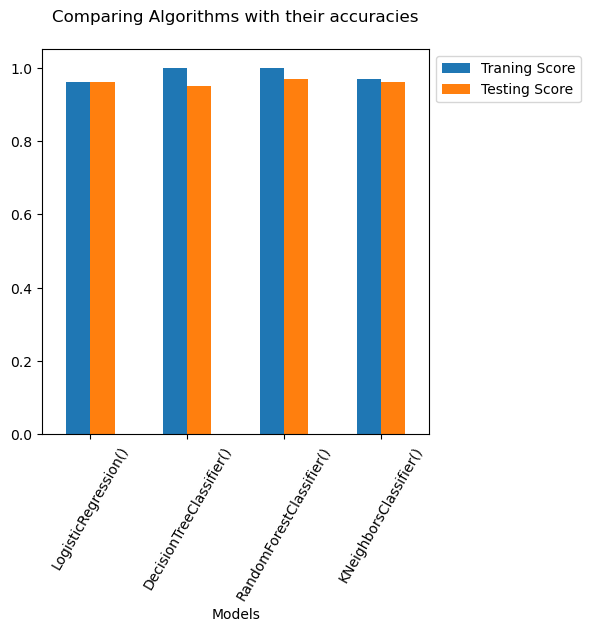

In [38]:
import matplotlib.pyplot as plt
result.plot(
        x='Models', 
        y=['Traning Score','Testing Score'], 
        kind='bar', 
        figsize=(5,5)).legend( bbox_to_anchor =(1 ,1))
plt.title('Comparing Algorithms with their accuracies',pad=20)
plt.xticks(rotation=60)
plt.show()